In [2]:
import os.path
import re
import sys
import tarfile
import time
import multiprocessing as mp
import itertools
import csv

import glob
import cPickle as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.python.platform import gfile
from run_inference import predict_star, predict
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Function to Parse Accuracies/Loss from a log file


In [4]:
def to_deci(s):
    return float(s.strip('\n%'))/100

def get_acc_and_loss(fn):
  with open(fn) as f:
    content = f.readlines()
  
  train_acc = [] #every 50
  valid_acc = [] #every 50
  top1 = [] #every 200
  top3 = [] #every 200
  top5 = [] #every 200
  loss = [] #every 50
  
  curr_step = 0
  for line in content:
    l = line.split(' ')
    if "accuracy" in line:
        if "test" in line:
            if "top 3" in line:
                if "Best" in line:
                    continue
                top3.append(to_deci(l[-1]))
            elif "top 5" in line:
                top5.append(to_deci(l[-1]))
            else:
                top1.append(to_deci(l[-1]))
        if "Train" in line:
            train_acc.append(to_deci(l[-1]))
        if "Validation" in line:
            valid_acc.append(to_deci(l[-1]))
    if "entropy" in line:
        loss.append(float(l[-1].strip('\n')))
        
  return train_acc, valid_acc, top1, top3, top5, loss 

In [55]:
train_2, val_2, top1_2, top3_2, top5_2, loss_2 = get_acc_and_loss("/data/10k_aug_outputs/log_10k_aug_preprocessed_lr0.005.txt")
train, val, top1, top3, top5, loss = get_acc_and_loss("/data/10k_aug_outputs/log_10k_aug_preprocessed_lr1e-3_adam.txt")
train_4, val_4, top1_4, top3_4, top5_4, loss_4 = get_acc_and_loss("/data/10k_aug_outputs/log_10k_aug_preprocessed_lr2e-4_adam.txt")
train_3, val_3, _, _, _, loss_3= get_acc_and_loss("/data/10k_aug_outputs/log_10k_aug_preprocessed_lr5e-3_adam.txt")
_, _, _, _, _, loss_5 = get_acc_and_loss("/data/10k_aug_outputs/log_10k_aug_preprocessed_lr8e-4_adam.txt")


## Plot of training vs. validation vs. test accuracies

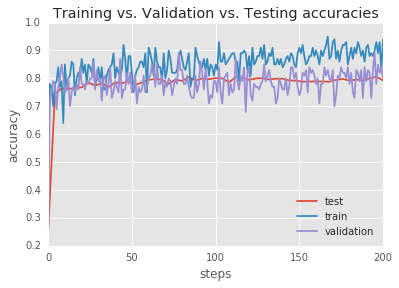

In [48]:
plt.plot(range(0, 201, 4), top1, label="test")
plt.plot(train, label="train")
plt.plot(val, label="validation")
plt.title('Training vs. Validation vs. Testing accuracies')
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.legend(loc=4)

## Plot of top1, top3, and top5 Results

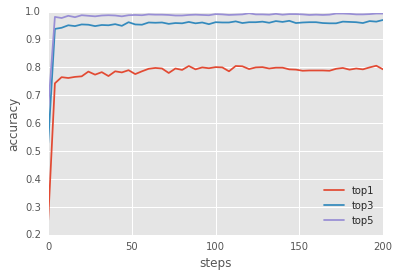

In [49]:
plt.plot(range(0, 201, 4), top1, label="top1")
plt.plot(range(0, 201, 4), top3, label="top3")
plt.plot(range(0, 201, 4), top5, label="top5")
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.legend(loc=4)

## Plot of different gradient descent methods

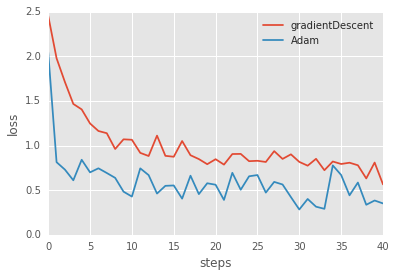

In [54]:
x_len = len(loss_2)
plt.plot(range(x_len), loss_2, label="gradientDescent")
plt.plot(range(x_len), loss_3[:x_len], label="Adam")
plt.xlabel('steps')
plt.ylabel('loss')
plt.legend(loc=1)

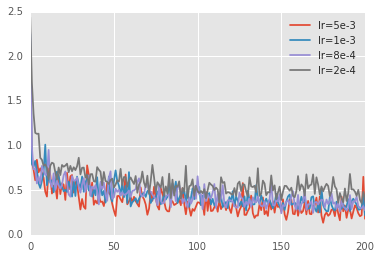

In [57]:
plt.plot(loss_3, label="lr=5e-3")
plt.plot(loss, label="lr=1e-3")
plt.plot(loss_5, label="lr=8e-4")
plt.plot(loss_4, label="lr=2e-4")
plt.legend(loc=1)